In [1]:
import pltutils as pltu
import numpy as np
from keras import layers
from keras.layers import Conv2D, Activation, Add, Flatten, Dense, Input, Reshape, MaxPooling2D
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
train = x_train/255.
test = x_test/255.
cls_train = y_train
cls_test = y_test
cat_train = np_utils.to_categorical(y_train, num_classes=10)
cat_test = np_utils.to_categorical(y_test, num_classes=10)

In [3]:
def ResidualBlock(filters, input_shape=(28,28,1)):
    X_input = Input(input_shape)
    X_shortcut = Conv2D(filters,(1,1), padding='same')(X_input)
    X = X_input
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters,(3,3), padding='same')(X)
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    model = Model(inputs=X_input, outputs=X)
    return model


In [4]:
def ResNet():
    X_input = Input((28,28))
    X = Reshape((28,28,1),input_shape=(28,28))(X_input)
    X = ResidualBlock(16, input_shape=(28,28,1))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(32, input_shape=(14,14,16))(X)
    
    X = MaxPooling2D((2,2))(X)
    X = ResidualBlock(64, input_shape=(7,7,32))(X)
    
    #X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(128, activation='relu')(X)
    X = Dense(10,activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
   
    #model = Sequential()
    return model
    

In [5]:
model = ResNet()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
model_1 (Model)              (None, 28, 28, 16)        2512      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
model_2 (Model)              (None, 14, 14, 32)        14432     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
model_3 (Model)              (None, 7, 7, 64)          5753

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

In [7]:
model.fit(train, cat_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.1685 - accuracy: 0.9474
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.0408 - accuracy: 0.9873
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0268 - accuracy: 0.9918
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0198 - accuracy: 0.9942
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0147 - accuracy: 0.9953


In [8]:
loss, accuracy = model.evaluate(test,cat_test)
print ("loss:{0}, accuracy:{1}".format(loss, accuracy))

10000/10000 [==============================] - 1s 148us/step
loss:0.027603459890242085, accuracy:0.9914000034332275


In [9]:
cat_test_pred = model.predict(test)
cls_test_pred = np.argmax(cat_test_pred, axis=1)

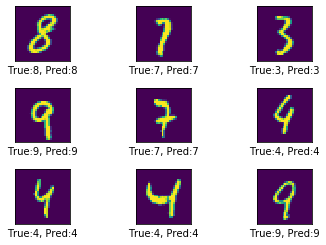

In [165]:
start = 110
end = start+10
pltu.plot_images(test[start:end],cls_test[start:end],cls_test_pred[start:end])

In [ ]:
plot_error_images